In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53,47
1,0.85566,3.2,5.9,55,35
2,0.68025,3.2,9.3,41,32
3,0.25936,3.2,8.2,47,34
4,0.60447,3.8,10.0,75,33


In [5]:
X = df.iloc[:,0:4].values

In [6]:
X

array([[ 0.95822,  3.4    ,  8.2    , 53.     ],
       [ 0.85566,  3.2    ,  5.9    , 55.     ],
       [ 0.68025,  3.2    ,  9.3    , 41.     ],
       ...,
       [ 0.88197,  3.9    ,  6.2    , 54.     ],
       [ 0.47336,  3.5    ,  7.3    , 61.     ],
       [ 0.58119,  3.7    ,  9.7    , 79.     ]], shape=(1388, 4))

In [7]:
Y = df.iloc[:,4:].values

In [8]:
Y

array([[47],
       [35],
       [32],
       ...,
       [36],
       [34],
       [35]], shape=(1388, 1))

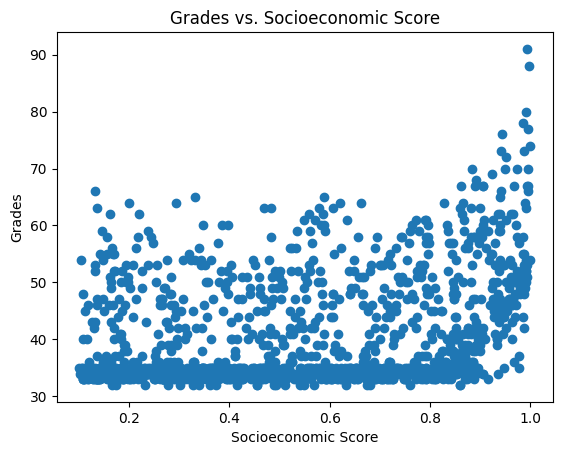

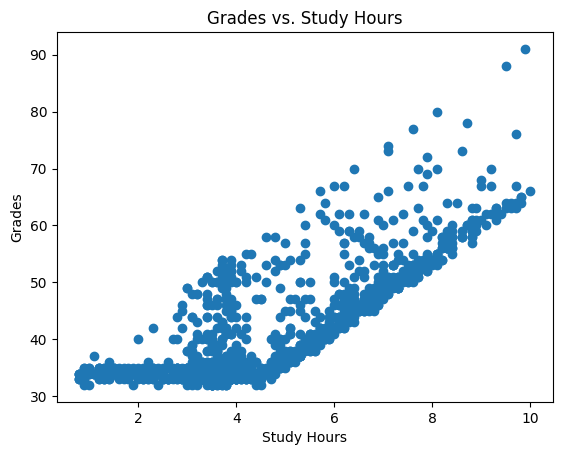

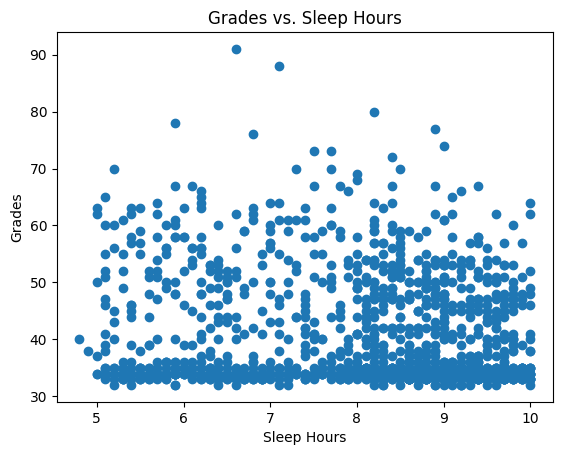

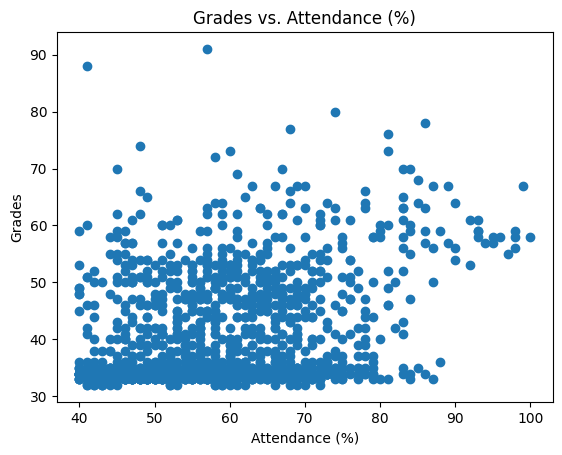

In [9]:
features = ['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']

for feature in features:
    plt.scatter(df[feature], df['Grades'])
    plt.xlabel(feature)
    plt.ylabel('Grades')
    plt.title(f'Grades vs. {feature}')
    plt.show()

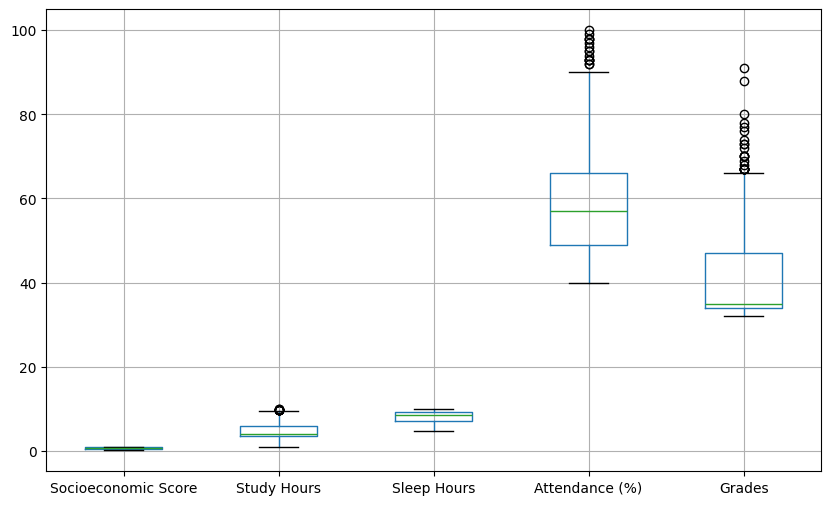

In [10]:
df.boxplot(figsize=(10, 6))
plt.show()

### Sanity Checking 

In [11]:
df.shape

(1388, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   int64  
 4   Grades               1388 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 54.3 KB


In [13]:
# checking whether the data has any missing values or not
df.isnull().sum()

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64

In [14]:
# checking in %
df.isnull().sum()/df.shape[0] * 100

Socioeconomic Score    0.0
Study Hours            0.0
Sleep Hours            0.0
Attendance (%)         0.0
Grades                 0.0
dtype: float64

In [15]:
# finding duplicate values
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

# or
# df.duplicated().sum

Empty DataFrame
Columns: [Socioeconomic Score, Study Hours, Sleep Hours, Attendance (%), Grades]
Index: []


In [16]:
# checking for garbage value
# how to identify ? > if there is any column having any garbage value then in df.info() the type of that col will say its object
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("*****" * 10)

In [17]:
print(df.dtypes)

Socioeconomic Score    float64
Study Hours            float64
Sleep Hours            float64
Attendance (%)           int64
Grades                   int64
dtype: object


### EDA

In [18]:
# descriptive statistics
df.describe().T # this T for just alignment

,count,mean,std,min,25%,50%,75%,max
Socioeconomic Score,1388.0,0.552274,0.261272,0.10128,0.322118,0.545945,0.78961,0.99982
Study Hours,1388.0,4.560807,1.897581,0.80000,3.475000,3.900000,5.90000,10.00000
Sleep Hours,1388.0,8.047262,1.370700,4.80000,7.000000,8.400000,9.10000,10.00000
Attendance (%),1388.0,58.536023,11.675287,40.00000,49.000000,57.000000,66.00000,100.00000
Grades,1388.0,40.691643,9.467358,32.00000,34.000000,35.000000,47.00000,91.00000


In [19]:
# check for any object columns
if any(df.dtypes == 'object'):
    print(df.describe(include='object'))
else:
    print("No object columns to describe")

No object columns to describe


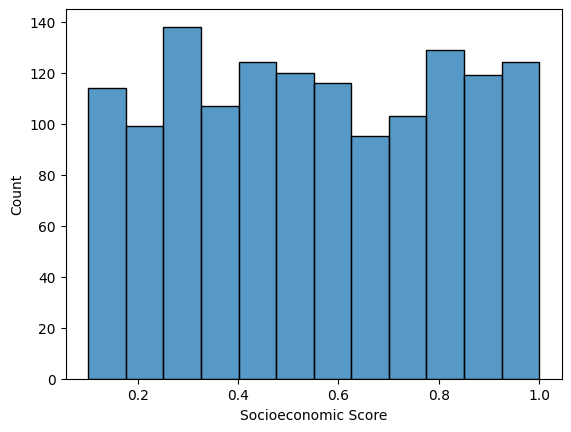

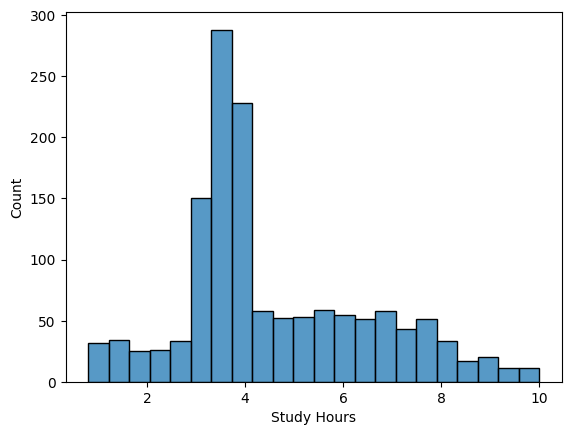

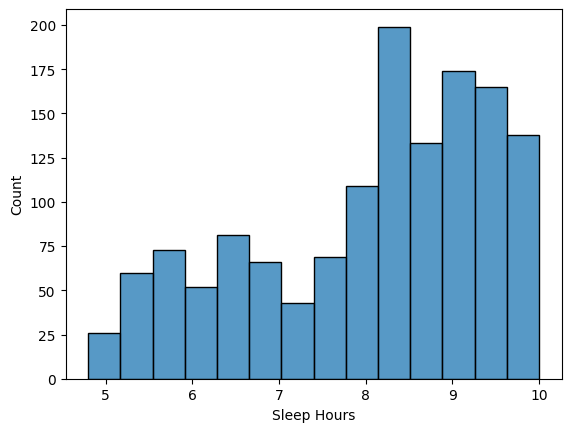

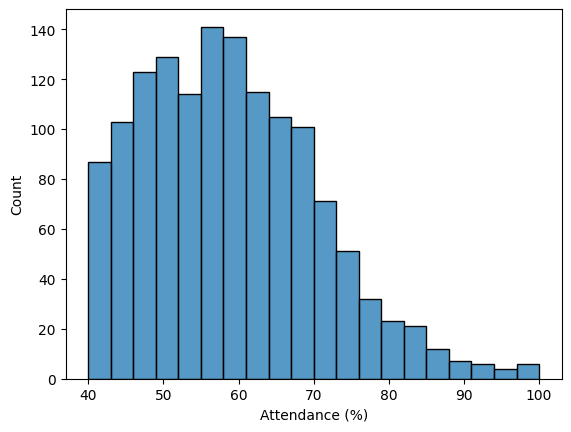

In [20]:
# histogram to understand the distribution of data
import seaborn as sns
features = ['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']

for feature in features:
    sns.histplot(data= df, x=feature)
    plt.show()

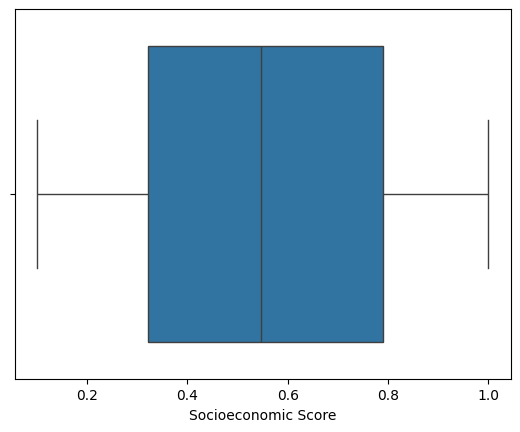

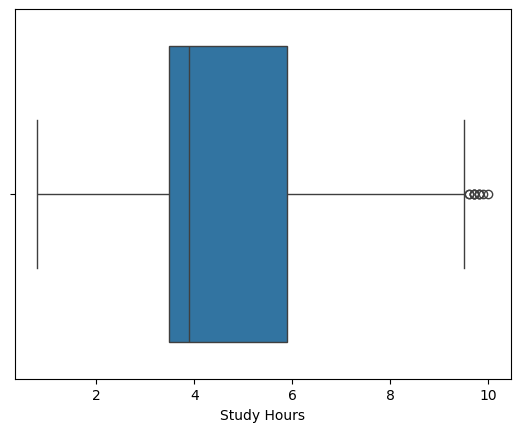

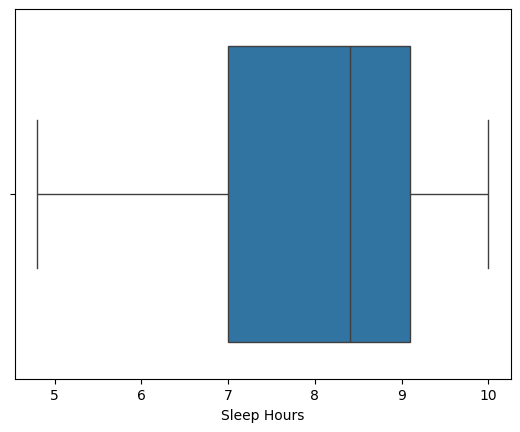

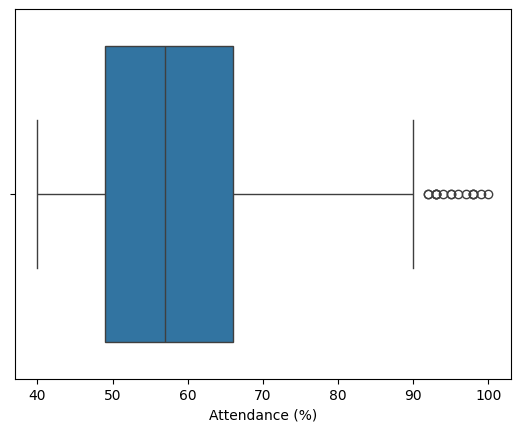

In [21]:
# boxplot to identify outliers
features = ['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']

for feature in features:
    sns.boxplot(data= df, x=feature)
    plt.show()

In [22]:
df.select_dtypes(include='number').columns

Index(['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)',
       'Grades'],
      dtype='object')

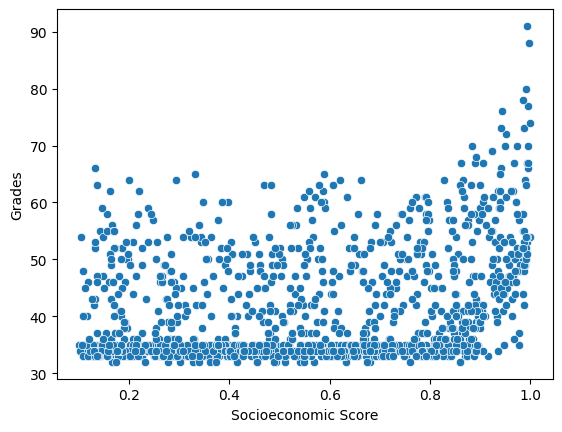

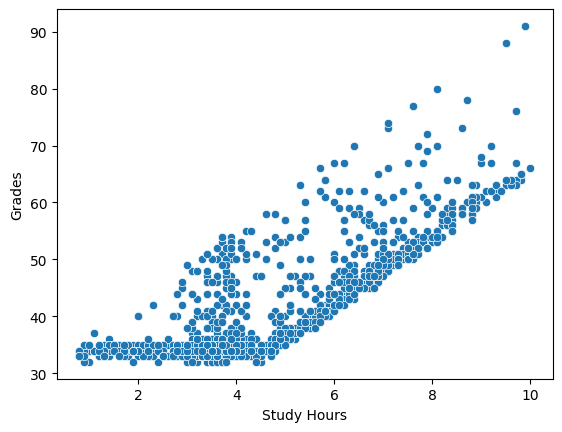

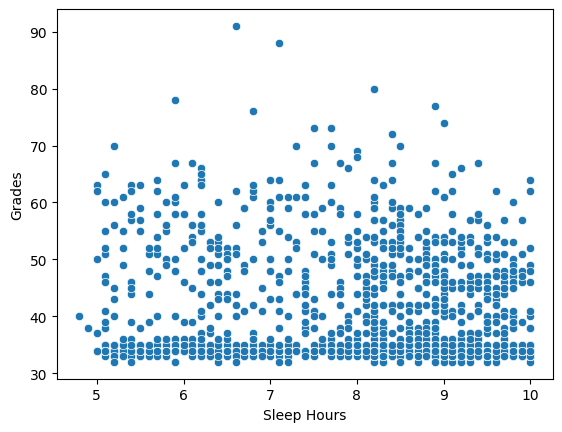

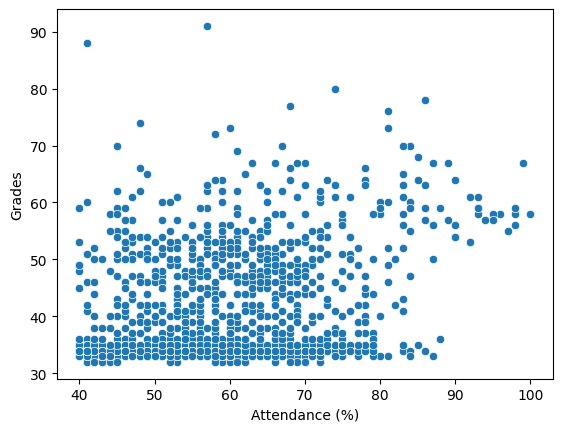

In [23]:
for i in ['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']:
    sns.scatterplot(data = df, x = i,y= 'Grades')
    plt.show()

In [24]:
# correlation with heatmap to interpret the relation and multicolliniarity
correlationMatrix = df.select_dtypes(include='number').corr()

<Axes: >

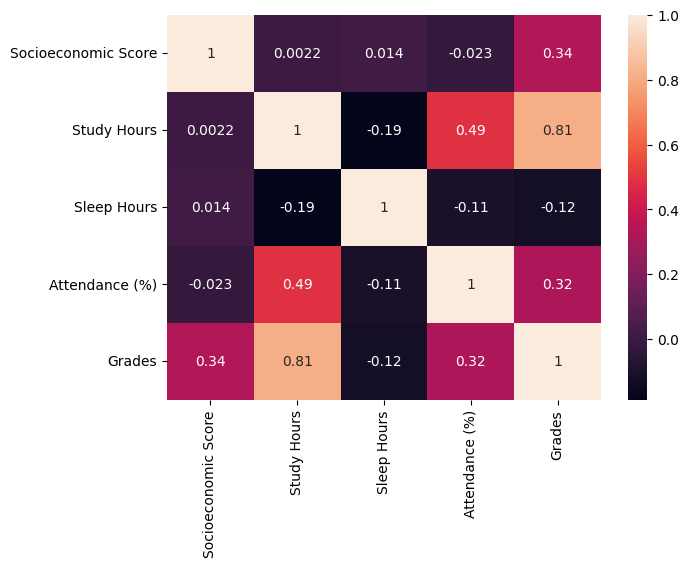

In [25]:
# lets visualize using heatmap
plt.figure(figsize=(7,5))
sns.heatmap(correlationMatrix, annot=True)

#### Here we can see the grades has more correlation with the study hours about 81%

### Missing Value Treatments
- Choose the method of imputing missing values
- like mean, median, mode and KNNImputer

**KNNImputer:** It works well with the numeric data's (columns), it fills all the null values with their `average of nearest neighbours` <br>
**Median & Mean:** If the data is continuous then use this else for discrete or categorical column the data should be filled with `mode` <br>
**Note:** For target variable (it is the colum which we are gonna predict i.e "Grade") we don't do missing value or outlier treatment on it , because if we do that then the target will become artificial data

In [26]:
# check whether any null value containing columns!
df.isnull().sum()

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64

The above observation shows that there is no null values in the columns

In [27]:
# Keep this code : if there will be any null values then apply this and firstly check whether that data is continuous or discrete
# here i'm doing this for continuous data
for feature in ['Socioeconomic Score',	'Study Hours',	'Sleep Hours',	'Attendance (%)']:
    df[feature].fillna(df[feature].mean())


In [28]:
df.iloc[:,0:4]

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%)
0,0.95822,3.4,8.2,53
1,0.85566,3.2,5.9,55
2,0.68025,3.2,9.3,41
3,0.25936,3.2,8.2,47
4,0.60447,3.8,10.0,75
...,...,...,...,...
1383,0.44549,5.5,8.0,51
1384,0.52466,4.9,6.5,63
1385,0.88197,3.9,6.2,54
1386,0.47336,3.5,7.3,61


In [29]:
# for discrete data u should simply use 'mode'
for feature in ['Socioeconomic Score',	'Study Hours',	'Sleep Hours',	'Attendance (%)']:
    df[feature].fillna(df[feature].mode([3])) # here i have used index to work for that specific column

#### Here comes the KNNImputer which works well for missing values, it is buit-in module in scikit-learn

In [30]:
from sklearn.impute import KNNImputer
impute = KNNImputer()

In [31]:
# now filling all the missing values with KNNImputer

for i in df.select_dtypes(include='number').columns:
    df[i] = impute.fit_transform(df[[i]]) # this will fill all the missing values using their average of nearest neighbours

In [32]:
df.isnull().sum()

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64

### Outliers Treatment

> **About:** Outliers are the extreme values that lie far from the typical range. <br>

e.g. : 
- If most people earn ₹30k–₹60k per month, but someone earns ₹5k or ₹5 lakhs... 
- Those ₹5k and ₹5 lakhs are the extreme values — a.k.a. outliers.

**Note:** We do outlier treatment only on continous variable and we shouldn't do it on the target variable/output variable and discrete variable


In [34]:
# Here defining a whisker function to cap the outliers 
import numpy as np
def whisker(col):
    q1, q3 = np.percentile(col,[25,75])
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    return lower_whisker, upper_whisker

In [41]:
lw,uw = whisker(df['Study Hours'])

In [43]:
print(lw,uw)

-0.1625000000000001 9.537500000000001


In [44]:
# now we will remove the outliers from some continous tables 
for i in ['Study Hours']:
    lw, uw = whisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])


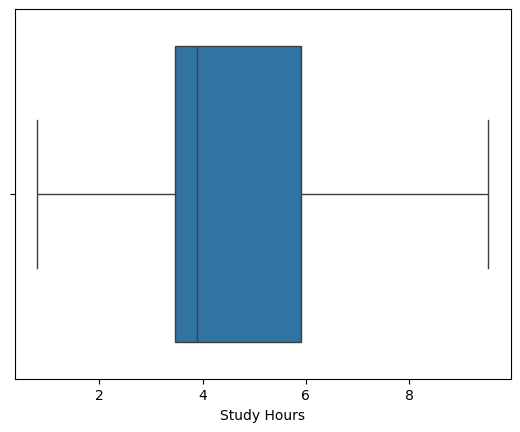

In [45]:
# now we will chheck for box plot has it removed the outliers or not

for i in ['Study Hours']:
    sns.boxplot(data = df, x = i)
    plt.show()

In [48]:
print((df['Study Hours'] == lw).sum() + (df['Study Hours'] == uw).sum())

11


**Means**
- Your dataset has 1,388 rows.
- 11 rows were outliers (below lw or above uw) that got capped 


In [53]:
# Percentage of rows affected
percent_of_rows = 11 / 1388 * 100
print(f" About {percent_of_rows:.2f} % of rows were affected!")


 About 0.79 % of rows were affected!
